# Problem Approach

Steps followed:
1.   Connecting with Google Drive
2.   Dropping unwanted column for dataset
2.   Importing Dataset
3.   Installing and Importing Libraries
4.   Checking Null Values
5.   Dropping column with 100% null values
6.   Creating new columns to analyse data
7.   Checking Correlation between fields
8.   Analyzing data based on different types of charts
9.   Visualizing data using map

Type of Analysis: **Descriptive and Diagnostic Analysis**

# Connecting to Drive and importing data

Connecting to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# shell command
# creat shortcut of the folder to mydrive
%cd /content/gdrive/MyDrive/CDC_Forest_Fire/
# %cd ~/Downloads
!ls

/content/gdrive/MyDrive/Colab Notebooks/CDC_Forest_Fire
Natural_Science_Forest_Fire.ipynb  NautralSciences_Dataset.xlsx


Importing Required Libraries

In [4]:
!pip install plotly

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
# convert datetime format
from datetime import datetime, timedelta

Importing Data

We have removed the code and id columns which we are not going to use for our Analysis, the columns include:
'OBJECTID','FOD_ID','FPA_ID','SOURCE_SYSTEM','NWCG_REPORTING_UNIT_ID','LOCAL_FIRE_REPORT_ID','SOURCE_REPORTING_UNIT','LOCAL_INCIDENT_ID','FIRE_CODE''FIRE_NAME','ICS_209_INCIDENT_NUMBER','ICS_209_NAME','MTBS_ID','MTBS_FIRE_NAME','COMPLEX_NAME','DISCOVERY_DATE','STAT_CAUSE_CODE', 'CONT_DATE','OWNER_CODE','FIPS_CODE','FIPS_NAME'

In [6]:
# Creating dataframe to store data
raw_df = pd.read_excel('NautralSciences_Dataset.xlsx', sheet_name='Fires')

In [7]:
# Get sense of data
print(raw_df.head())
print(raw_df.info())

  SOURCE_SYSTEM_TYPE NWCG_REPORTING_AGENCY  NWCG_REPORTING_UNIT_NAME  \
0             NONFED                ST/C&L  San Benito-Monterey Unit   
1             NONFED                ST/C&L  San Benito-Monterey Unit   
2             NONFED                ST/C&L  San Benito-Monterey Unit   
3             NONFED                ST/C&L  San Benito-Monterey Unit   
4             NONFED                ST/C&L  San Benito-Monterey Unit   

       SOURCE_REPORTING_UNIT_NAME  FIRE_YEAR  DISCOVERY_DOY  DISCOVERY_TIME  \
0  CDF - San Benito-Monterey Unit       2010            139             NaN   
1  CDF - San Benito-Monterey Unit       2010            159             NaN   
2  CDF - San Benito-Monterey Unit       2010            163             NaN   
3  CDF - San Benito-Monterey Unit       2010            165             NaN   
4  CDF - San Benito-Monterey Unit       2010            192             NaN   

  STAT_CAUSE_DESCR  CONT_DOY  CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  \
0    Equipm

# Data Cleaning/Wrangling and Feature Engineering

In [8]:
#Checking for null values
(raw_df.isnull().sum() / len(raw_df)) * 100

SOURCE_SYSTEM_TYPE              0.000000
NWCG_REPORTING_AGENCY           0.000000
NWCG_REPORTING_UNIT_NAME        0.000000
SOURCE_REPORTING_UNIT_NAME      0.000000
FIRE_YEAR                       0.000000
DISCOVERY_DOY                   0.000000
DISCOVERY_TIME                 56.215751
STAT_CAUSE_DESCR                0.000000
CONT_DOY                       57.883604
CONT_TIME                      60.703944
FIRE_SIZE                       0.000000
FIRE_SIZE_CLASS                 0.000000
LATITUDE                        0.000000
LONGITUDE                       0.000000
OWNER_DESCR                     0.000000
STATE                           0.000000
COUNTY                         34.139825
Shape                         100.000000
dtype: float64

In [9]:
#Dropping the Shape column as it's empty
raw_df = raw_df.drop(columns = ['Shape'])

Creating new columns

In [10]:
# Defining function to get the month of year, using strftime() instance method w/ formating codes
def get_month(year, doy):
  if year % 4 == 0:
    return (datetime(2000, 1, 1) + timedelta(days = doy-1)).strftime('%B')
  else:
    return (datetime(2001, 1, 1) + timedelta(days = doy-1)).strftime('%B')


# Creating a month field to get the month of year in which the fire was discovered
# apply get_month() method to rot (axis = 1)
raw_df['DISCOVERY_MONTH'] = raw_df.apply(lambda row: get_month(row['FIRE_YEAR'], row['DISCOVERY_DOY']), axis=1)
# convert data type = category
raw_df["DISCOVERY_MONTH"] = raw_df["DISCOVERY_MONTH"].astype("category")


print(raw_df['DISCOVERY_MONTH'].unique())

['May', 'June', 'July', 'September', 'March', ..., 'January', 'February', 'April', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November',
                          'October', 'September']


Understanding Correlation between the features

*   Change into categorical data, here is some example



In [11]:
temp_df = raw_df[['STATE', 'DISCOVERY_MONTH']].copy()
temp_df['STATE'] = temp_df['STATE'].astype("category")

# list the unique value of category
temp_df['STATE'].cat.categories
# create the dictionary for the category
dict_state = dict(enumerate(temp_df['STATE'].cat.categories))
print(dict_state)

# change category value into the key (int8)
temp_df['STATE'] = temp_df['STATE'].cat.codes
print(temp_df)

{0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'ME', 22: 'MI', 23: 'MN', 24: 'MO', 25: 'MS', 26: 'MT', 27: 'NC', 28: 'ND', 29: 'NE', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NV', 34: 'NY', 35: 'OH', 36: 'OK', 37: 'OR', 38: 'PA', 39: 'PR', 40: 'RI', 41: 'SC', 42: 'SD', 43: 'TN', 44: 'TX', 45: 'UT', 46: 'VA', 47: 'VT', 48: 'WA', 49: 'WI', 50: 'WV', 51: 'WY'}
        STATE DISCOVERY_MONTH
0           4             May
1           4            June
2           4            June
3           4            June
4           4            July
...       ...             ...
937967     11           March
937968     11            July
937969     11           March
937970     11           March
937971     11           March

[937972 rows x 2 columns]


<ipython-input-12-d52ecd8d8906>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr() * 100, annot=True, cmap='YlGnBu', linewidths=0.3)


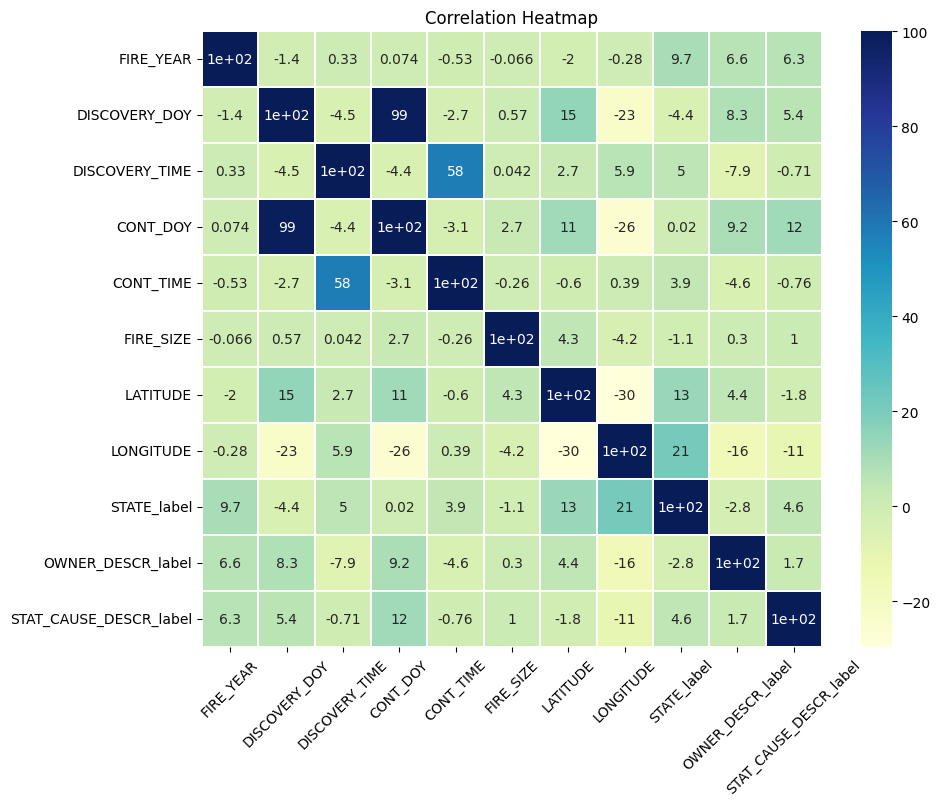

In [12]:
# Label encoding to include categorical data in heatmap
raw_df['STATE_label'] = raw_df['STATE'].astype('category').cat.codes
raw_df['OWNER_DESCR_label'] = raw_df['OWNER_DESCR'].astype('category').cat.codes
raw_df['STAT_CAUSE_DESCR_label'] = raw_df['STAT_CAUSE_DESCR'].astype('category').cat.codes

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # figure size
sns.heatmap(raw_df.corr() * 100, annot=True, cmap='YlGnBu', linewidths=0.3)

# Customize the heatmap appearance (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the heatmap
plt.show()

# Data Analysis

Fires by discovery day of year by fire size

<Axes: title={'center': 'Size of Fire by Day of Year'}, xlabel='DISCOVERY_DOY', ylabel='FIRE_SIZE'>

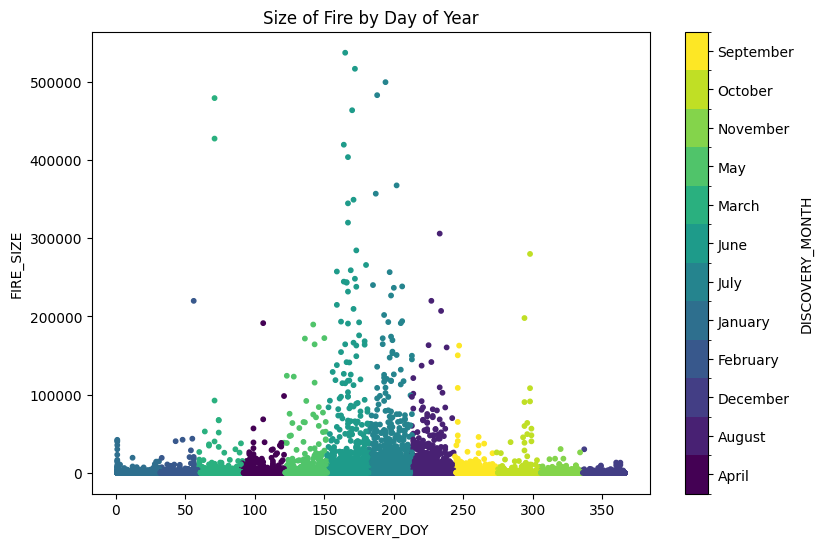

In [13]:
raw_df.plot.scatter(
    x="DISCOVERY_DOY", y="FIRE_SIZE", c="DISCOVERY_MONTH", cmap="viridis", s=10, title= 'Size of Fire by Day of Year',
    figsize=(9,6)
  )

Fires by year by class

FIRE_YEAR  FIRE_SIZE_CLASS
2000       A                    3841.705
           B                  110961.460
           C                  343974.470
           D                  253745.340
           E                  431962.370
Name: FIRE_SIZE, dtype: float64


<Axes: title={'center': 'Acres of Land Affect Per Year and the Fire Size Class'}, xlabel='FIRE_YEAR'>

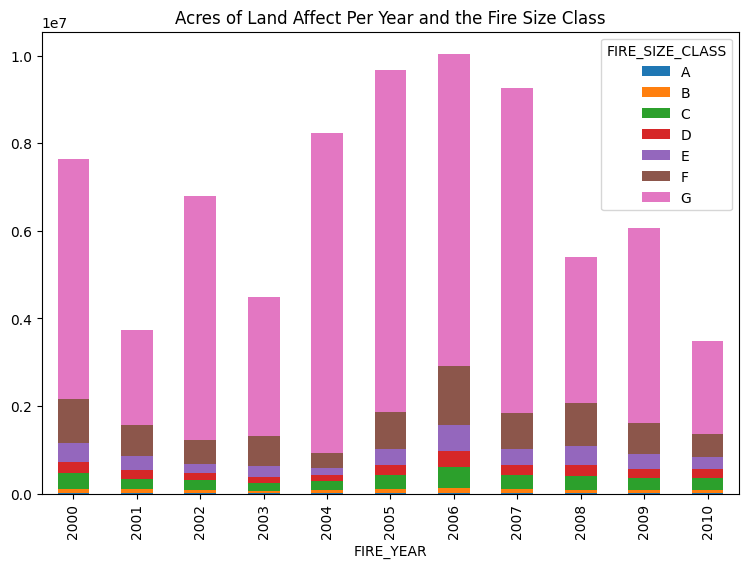

In [14]:
df2 = raw_df.groupby(["FIRE_YEAR", "FIRE_SIZE_CLASS"])["FIRE_SIZE"].sum()
print(df2.head())
# unstack fire size class
df2 = df2.unstack("FIRE_SIZE_CLASS")
df2.plot.bar(stacked=True, figsize=(9,6), title = 'Acres of Land Affect Per Year and the Fire Size Class')

Fires by month

<Axes: title={'center': 'Number of Incidents per month'}>

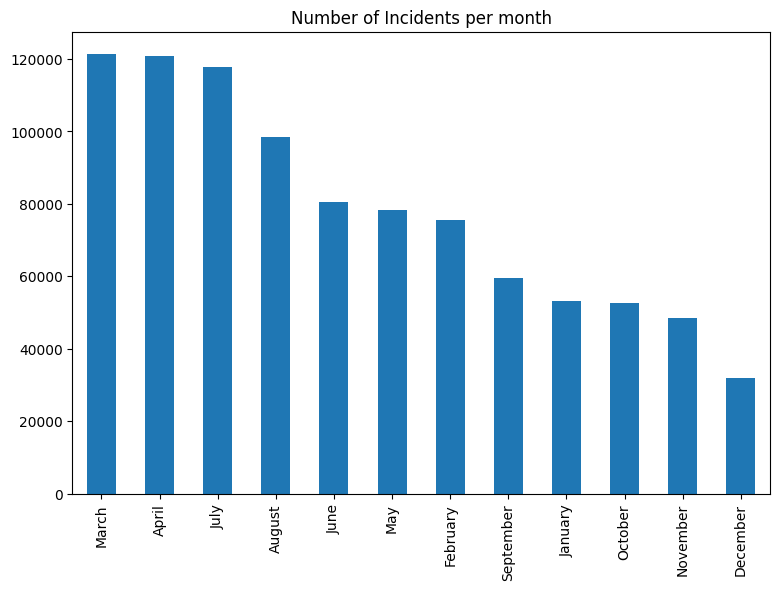

In [15]:
month_count = pd.value_counts(raw_df["DISCOVERY_MONTH"].values)
month_count.plot.bar(figsize=(9, 6), title = 'Number of Incidents per month')

Calculating the recovery time required

In [16]:
#Defining function to convert time in proper format

def format_time(time):
  if len(time) == 1:
    time = '0'+time[:1]+':00:00'
  elif len(time) == 2:
    time = '0'+time[:1]+':0'+time[1:2]+':00'
  elif len(time) == 3:
    time = '0'+time[:1]+':'+time[1:3]+':00'
  elif len(time) == 4:
    time = time[:2]+':'+time[2:]+':00'
  return time


In [17]:
# Create new dataframe by eliminating null values from the given columns
recovery_df = raw_df.dropna(subset=['CONT_DOY', 'CONT_TIME', 'DISCOVERY_TIME']).copy()

# Formate the time columns
recovery_df['DISCOVERY_TIME'] = recovery_df['DISCOVERY_TIME'].apply(lambda row: format_time(str(round(row))))

recovery_df['DISCOVERY_DOY'] = recovery_df['DISCOVERY_DOY'].astype(int)
recovery_df['FIRE_YEAR'] = recovery_df['FIRE_YEAR'].astype(int)

# Create a proper date of contained fire
recovery_df['DISCOVERY_DATE'] = pd.to_datetime(recovery_df['FIRE_YEAR'], format='%Y') + \
                           pd.to_timedelta(recovery_df['DISCOVERY_DOY'], unit='D') + \
                           pd.to_timedelta(recovery_df['DISCOVERY_TIME'])

# Formate the time columns
recovery_df['CONT_TIME'] = recovery_df['CONT_TIME'].apply(lambda row: format_time(str(round(row))))

recovery_df['CONT_DOY'] = recovery_df['CONT_DOY'].astype(int)
recovery_df['FIRE_YEAR'] = recovery_df['FIRE_YEAR'].astype(int)

# Create a proper date of contained fire
recovery_df['CONT_DATE'] = pd.to_datetime(recovery_df['FIRE_YEAR'], format='%Y') + \
                           pd.to_timedelta(recovery_df['CONT_DOY'], unit='D') + \
                           pd.to_timedelta(recovery_df['CONT_TIME'])


recovery_df['DATE_DIFFERENCE'] = recovery_df['CONT_DATE'] - recovery_df['DISCOVERY_DATE']

recovery_df['Hours'] = recovery_df['DATE_DIFFERENCE'].dt.seconds / 3600
recovery_df['Minutes'] = (recovery_df['DATE_DIFFERENCE'].dt.seconds % 3600) / 60
recovery_df['TIME_DIFFERENCE'] = recovery_df['Hours'].astype(float) + recovery_df['Minutes'].astype(float) / 60.0

print(recovery_df['TIME_DIFFERENCE'])

1388      0.000000
1389      0.000000
1392      0.066667
1407      5.400000
1463      0.233333
            ...   
935655    0.000000
935656    0.000000
935657    0.000000
935658    0.000000
935659    0.000000
Name: TIME_DIFFERENCE, Length: 368015, dtype: float64


<Axes: title={'center': 'Number of hours required to contain the fire per year for each fire size class'}, xlabel='FIRE_YEAR'>

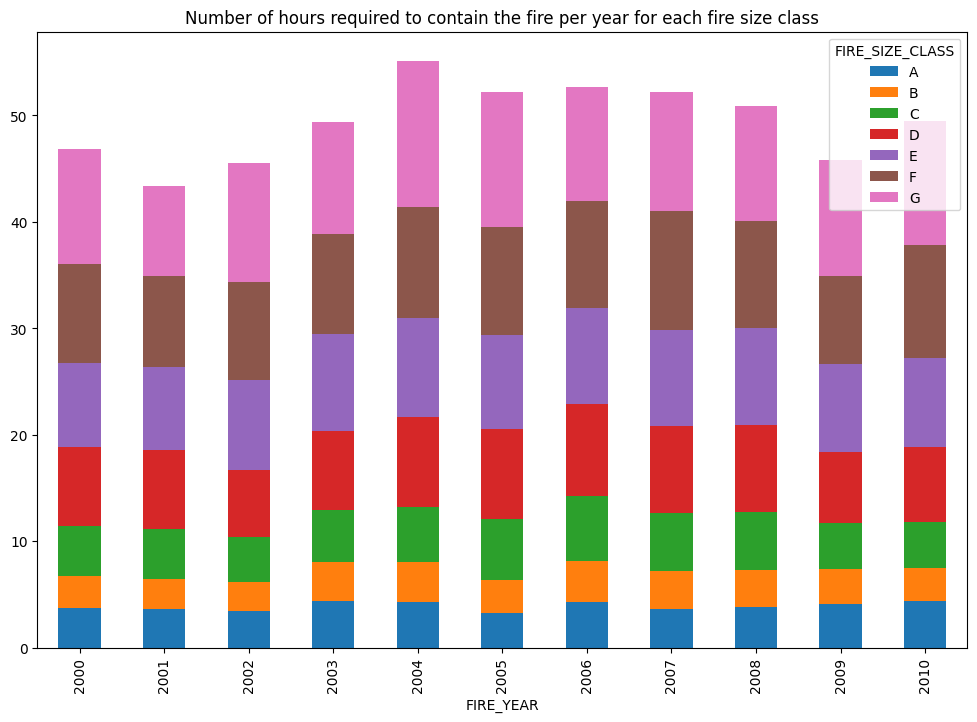

In [18]:
recovery_df2 = recovery_df.groupby(["FIRE_YEAR", "FIRE_SIZE_CLASS"])["TIME_DIFFERENCE"].mean()
recovery_df2 = recovery_df2.unstack("FIRE_SIZE_CLASS")
recovery_df2.plot.bar(stacked=True, figsize=(12,8), title = 'Number of hours required to contain the fire per year for each fire size class')

# Visualizations

In [23]:
# Defining function to create map
def create_map(dictionary, fig, title):
  # Create a Choropleth plot using state_counts_dict, state list = dict.keys(), z = dict.values()
  fig.add_trace(go.Choropleth(
      locations=list(dictionary.keys()),
      z=list(dictionary.values()),
      locationmode='USA-states',
      hoverinfo="z+location",
      showscale=True,
      colorscale='Reds',
      colorbar=dict(
          title="Incidents",
          xanchor="center",
          lenmode="fraction",
          len=0.5
      ),
  ))
  fig.update_geos(scope="usa")
  fig.update_layout(title_text=title)

In [24]:
# Group by 'State' and get the count of data in each group
count_of_states = raw_df.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_of_fire= go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_of_fire, 'Number of Incidents per state')

# Display the map
fig_size_of_fire.show()

In [ ]:
fire_size_A = raw_df[raw_df['FIRE_SIZE_CLASS'] == 'A'][['STATE']]

# Group by 'State' and get the count of data in each group
count_of_states = fire_size_A.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_A = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_A, 'Number of Incidents per state for Fire Size A')

# Display the map
fig_size_A.show()

In [26]:
fire_size_B = raw_df[raw_df['FIRE_SIZE_CLASS'] == 'B'][['STATE']]

# Group by 'State' and get the count of data in each group
count_of_states = fire_size_B.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_B = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_B, 'Number of Incidents per state for Fire Size B')

# Display the map
fig_size_B.show()

In [27]:
fire_size_C = raw_df[raw_df['FIRE_SIZE_CLASS'] == 'C'][['STATE']]
fire_size_C
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_C.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_C = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_C, 'Number of Incidents per state for Fire Size C')

# Display the map
fig_size_C.show()

In [28]:
raw_df['STAT_CAUSE_DESCR'].unique()

array(['Equipment Use', 'Miscellaneous', 'Debris Burning', 'Children',
       'Arson', 'Smoking', 'Railroad', 'Campfire', 'Lightning',
       'Powerline', 'Structure', 'Missing/Undefined', 'Fireworks'],
      dtype=object)

In [ ]:
fire_size_cause_Equipment_Use = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Equipment Use'][['STATE']]
fire_size_cause_Equipment_Use
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Equipment_Use.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Equipment_Use = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Equipment_Use, 'Number of Incidents per state caused by Equipment Use')

# Display the map
fig_size_cause_Equipment_Use.show()

In [29]:
fire_size_cause_Debris_Burning = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Debris Burning'][['STATE']]
fire_size_cause_Debris_Burning
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Debris_Burning.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Debris_Burning = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Debris_Burning, 'Number of Incidents per state caused by Debris Burning')

# Display the map
fig_size_cause_Debris_Burning.show()

In [30]:
fire_size_cause_Children = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Children'][['STATE']]
fire_size_cause_Children
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Children.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Children = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Children, 'Number of Incidents per state caused by Children')

# Display the map
fig_size_cause_Children.show()

In [31]:
fire_size_cause_Arson = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Arson'][['STATE']]
fire_size_cause_Arson
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Arson.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Arson = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Arson, 'Number of Incidents per state caused by Arson')

# Display the map
fig_size_cause_Arson.show()

In [32]:
fire_size_cause_Smoking = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Smoking'][['STATE']]
fire_size_cause_Smoking
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Smoking.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Smoking = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Smoking, 'Number of Incidents per state caused by Smoking')

# Display the map
fig_size_cause_Smoking.show()

In [33]:
fire_size_cause_Railroad = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Railroad'][['STATE']]
fire_size_cause_Railroad
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Railroad.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Railroad = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Railroad, 'Number of Incidents per state caused by Railroad')

# Display the map
fig_size_cause_Railroad.show()

In [34]:
fire_size_cause_Campfire = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Campfire'][['STATE']]
fire_size_cause_Campfire
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Campfire.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Campfire = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Campfire, 'Number of Incidents per state caused by Campfire')

# Display the map
fig_size_cause_Campfire.show()

In [35]:
fire_size_cause_Lightning = raw_df[raw_df['STAT_CAUSE_DESCR'] == 'Lightning'][['STATE']]
fire_size_cause_Lightning
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_cause_Lightning.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_cause_Lightning = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_cause_Lightning, 'Number of Incidents per state caused by Lightning')

# Display the map
fig_size_cause_Lightning.show()

In [36]:
fire_size_year_2010 = raw_df[raw_df['FIRE_YEAR'] == 2010][['STATE']]
fire_size_year_2010
# Group by 'State' and get the count of data in each group
count_of_states = fire_size_year_2010.groupby('STATE').size()

# Create a dictionary to map state codes to counts
count_of_states = count_of_states.to_dict()

# Create a plot
fig_size_year_2010 = go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_year_2010, 'Number of Incidents per state in the year 2010')

# Display the map
fig_size_year_2010.show()

In [37]:
# Defining function to create map
def create_map(dictionary, fig, title):
  # Create a Choropleth plot using state_counts_dict, state list = dict.keys(), z = dict.values()
  fig.add_trace(go.Choropleth(
      locations=list(dictionary.keys()),
      z=list(dictionary.values()),
      locationmode='USA-states',
      hoverinfo="z+location",
      showscale=True,
      colorscale='Reds',
      colorbar=dict(
          title="Incidents",
          xanchor="center",
          lenmode="fraction",
          len=0.5
      ),
  ))
  fig.update_geos(scope="usa")
  fig.update_layout(title_text=title)